#### Data Mining Project Final: Student Peformance Prediction
#### Siobhan Scott<br><br>
**<p> Objective: The objective of this project is to perform predictive analysis with classification and the
student performance dataset.<br>**


<p>The following will be presented with the Student Peformance Dataset: </p>
1. Data Exploration and Preprocessing<br>
2. Visualization Data Insight<br>
3. Feature Engineering<br>
4. Model Selection and Training<br>
5. Hyperparameter Tuning<br>
6. Model Evaluation<br>
7. Model Prediction<br>


### 1.  Import Packages


In [461]:
#some code so those pesky warnings from deprecated code won't appear
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
#the rest of the imports
#pandas for working with datasets
import pandas as pd
#numpy for working with arrays
import numpy as np
#seaborn for plotting and styling visualizations
import seaborn as sns
#matplotlib for additional customization
import matplotlib.pyplot as plt
#scikit-learn for preprocessing and modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
#datetime for working with dates
import datetime


### 2. Read Inputs

In [462]:
# encoding is a statement of the kinds of characters used
# this data set includes some special characters

#read the csv file student_performance_data_.csv into student_data
student_data = pd.read_csv("/content/Student_performance_data _.csv")
#let's take a look at the attributes and file size
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [463]:
#Looking at the data
student_data.head(100)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,16,1,2,3,19.278320,29,0,3,0,0,0,1,0.732908,4.0
96,1097,16,1,1,1,12.831594,29,0,4,0,0,1,0,0.965482,4.0
97,1098,18,0,0,2,0.468659,5,0,2,0,1,0,0,2.555233,2.0
98,1099,16,0,0,3,8.603518,25,0,2,1,0,1,1,0.744322,4.0


### 3. Data Pre-Processing

#### 3A: Check for missing values and replace them if any

In [464]:
#Using the isNUll feature to check if there are any missing values. 0: False, 1: True
missing_values = student_data.isnull().sum()
print(missing_values)

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


#### 3. B.  Check for rows(features) which have values that vary significantly in range compared to other features.



In [465]:
#Descibing the statistical data
student_data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
#Using StandardScaler to standardize features of the data
student_data = pd.DataFrame(StandardScaler().fit_transform(student_data), columns = student_data.columns)
print(student_data)




      StudentID       Age    Gender  Ethnicity  ParentalEducation  \
0     -1.731327  0.472919  0.978492  -0.853391           0.253711   
1     -1.729879  1.362944 -1.021981  -0.853391          -0.746087   
2     -1.728430 -1.307132 -1.021981   1.091641           1.253509   
3     -1.726982  0.472919  0.978492  -0.853391           1.253509   
4     -1.725534  0.472919  0.978492  -0.853391           0.253711   
...         ...       ...       ...        ...                ...   
2387   1.725534  1.362944  0.978492  -0.853391           1.253509   
2388   1.726982  0.472919 -1.021981  -0.853391          -0.746087   
2389   1.728430 -0.417106  0.978492  -0.853391           0.253711   
2390   1.729879 -0.417106  0.978492   0.119125          -1.745885   
2391   1.731327 -0.417106  0.978492  -0.853391           0.253711   

      StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  \
0            1.780336 -0.890822  1.522371        -0.108744        -0.788476   
1            

#### 3. C. Handle Outliers



In [466]:
#Printing the IQR
Q1 = student_data.quantile(0.25)
Q3 = student_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

StudentID            1195.500000
Age                     2.000000
Gender                  1.000000
Ethnicity               2.000000
ParentalEducation       1.000000
StudyTimeWeekly         9.365330
Absences               15.000000
Tutoring                1.000000
ParentalSupport         2.000000
Extracurricular         1.000000
Sports                  1.000000
Music                   0.000000
Volunteering            0.000000
GPA                     1.447413
GradeClass              2.000000
dtype: float64


In [467]:
#Identifying the outliers
outliers = student_data[((student_data < (Q1 - 1.5 * IQR)) |(student_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
7          1008   15       1          1                  4        15.424496   
8          1009   17       0          0                  0         4.562008   
11         1012   17       0          0                  1         7.598486   
18         1019   18       0          1                  3        16.254658   
...         ...  ...     ...        ...                ...              ...   
2375       3376   18       0          0                  2        18.925290   
2378       3379   15       1          0                  2        12.905555   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

In [468]:
# Printing results after removal
student_outliers = student_data[~((student_data < (Q1 - 1.5 * IQR)) | (student_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nData after removing outliers:")
print(student_outliers)



Data after removing outliers:
      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
5          1006   18       0          0                  1         8.191219   
...         ...  ...     ...        ...                ...              ...   
2384       3385   15       1          0                  1        16.655581   
2385       3386   16       1          0                  1         1.445434   
2386       3387   16       0          0                  2        13.814021   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   

      Absences  Tuto

#### 3. D. Dividing data into train and test sets



In [ ]:
x = student_data.drop(columns=['GPA'])
y = student_data['GPA']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1913, 14)
x_test shape: (479, 14)
y_train shape: (1913,)
y_test shape: (479,)


### 4. Data Visualization

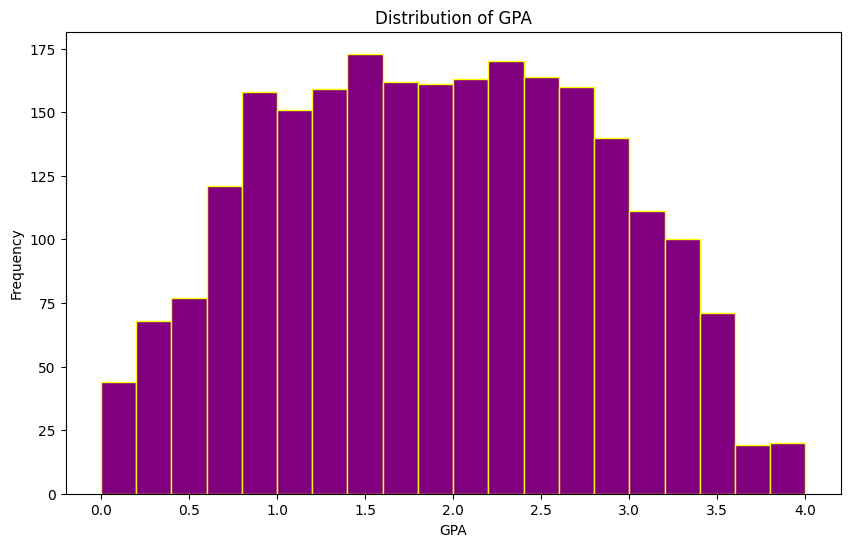

In [469]:
 # Code for Visualization 1
plt.figure(figsize=(10, 6))
plt.hist(student_data['GPA'], bins=20, color='purple', edgecolor='yellow')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


VISUALIZATION 1: This histogram shows the dispersement of the GPA scores of the students. This can help with finding the common GPA ranges.

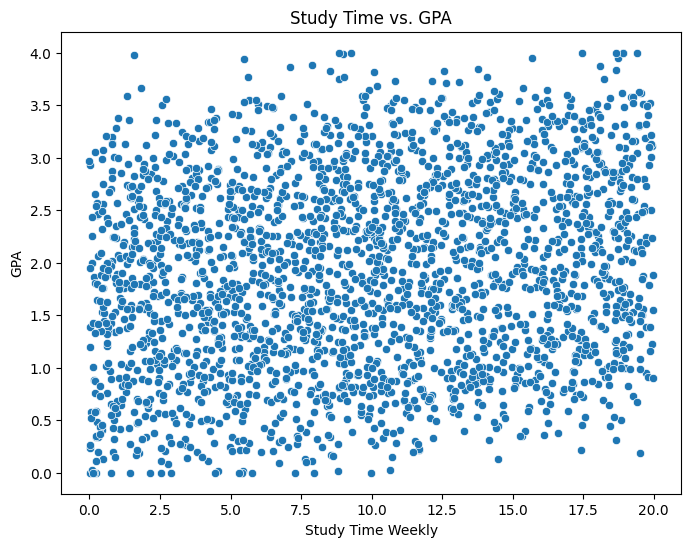

In [470]:
# Code for Visualization 2
plt.figure(figsize=(8,6))
sns.scatterplot(x='StudyTimeWeekly', y= 'GPA', data=student_data)
plt.title('Study Time vs. GPA')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.show()

VISUALIZATION 2: This scatter plot shows the correlation between 'StudyTimeWeekly' and 'GPA'. This can help us find trends within the data.

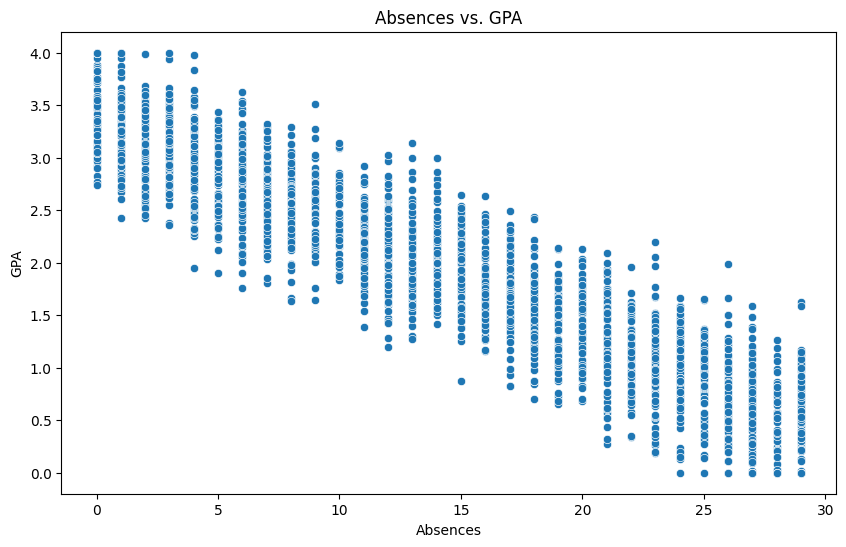

In [471]:
# Code for Visualization 3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Absences', y='GPA', data=student_data)
plt.title('Absences vs. GPA')
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.show()

VISUALIZATION 3: This scatter plot is to show the relation between absences and GPA. This can show if there is a trend between higher absences and lower GPA scores or vice versa.

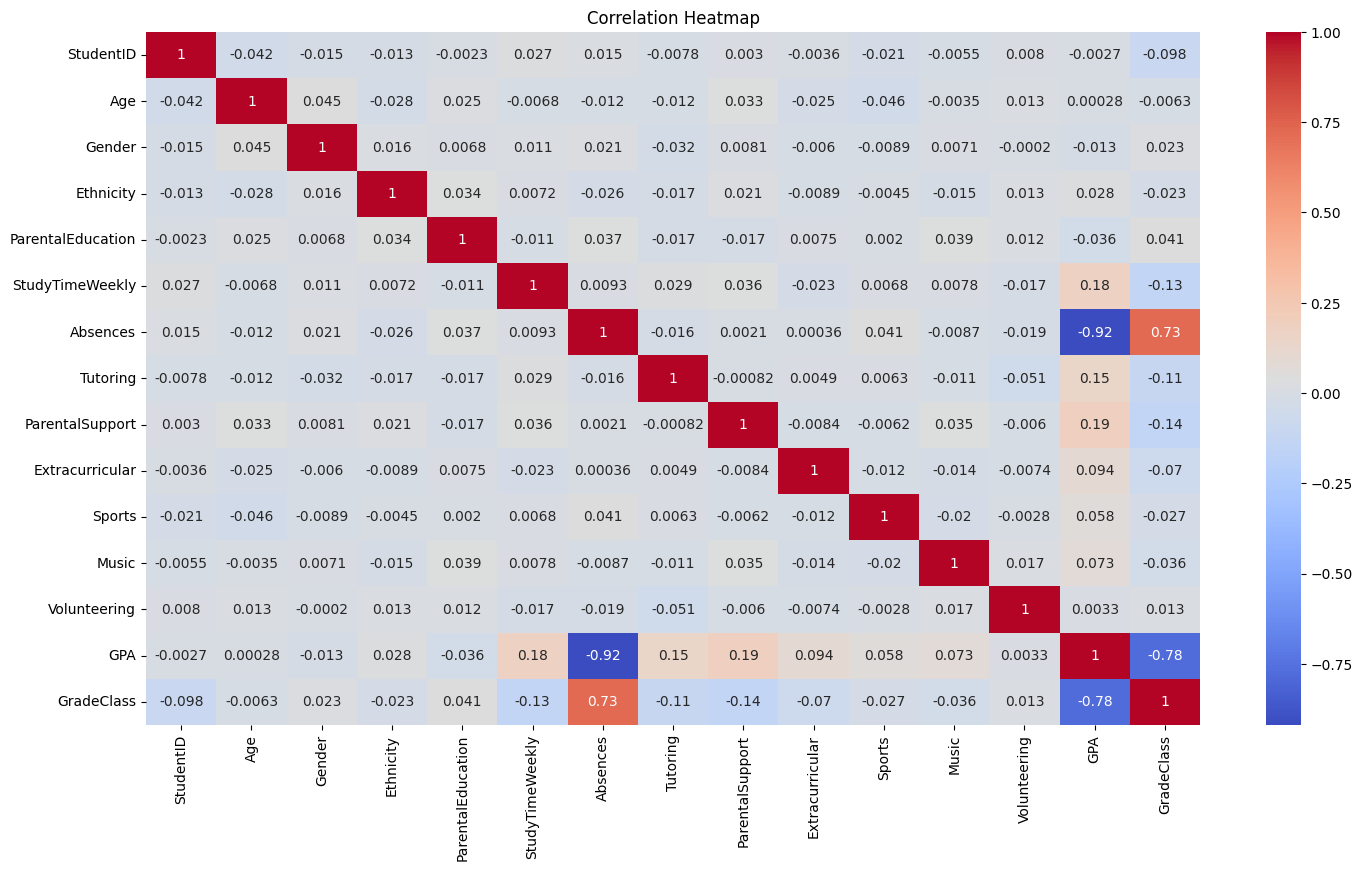

In [472]:
# Code for Visualization 4
plt.figure(figsize=(17, 9))
sns.heatmap(student_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

VISUALIZATION 4: This heatmap shows the correlation between the numerical data n the set. Strong correlations will be in dark colors, and weak correlations will be in light colors.

### 5. Feature Engineering and Selection
<p> Create new features based on the existing ones, which might help you with building the model and improve it's metrics like accuracy.
Out of all the available features, select the ones with the highest feature importance. </p>

In [473]:
#Create new features
student_data['TotalStudyTime'] = student_data['StudyTimeWeekly'] + student_data['Tutoring']
student_data['TotalSupport'] = student_data['ParentalSupport'] + student_data['Tutoring']
student_data['HighestAbsences'] =(student_data['Absences'] > 10).astype(int)
student_data['HighestGPA'] =(student_data['GPA'] > 3.0).astype(int)
student_data['HighestStudyTime'] =(student_data['StudyTimeWeekly'] > 10).astype(int)
print(student_data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  TotalStudyTime  TotalSupport  \
0             0  2.929196  

In [474]:
# Feature and Target Separation
X = student_data.drop(columns=['GradeClass'])  # Features
# Convert the 'GradeClass' column to discrete values if it's continuous
y = student_data['GradeClass'].astype(int)  # Target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the RandomForestClassifier
randomf = RandomForestClassifier(n_estimators=100, random_state=42)
randomf.fit(X_train_scaled, y_train)

# Get feature importances
importances = randomf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

              Feature  Importance
13                GPA    0.436254
6            Absences    0.154917
17         HighestGPA    0.091660
0           StudentID    0.084558
16    HighestAbsences    0.065714
14     TotalStudyTime    0.032051
5     StudyTimeWeekly    0.031958
15       TotalSupport    0.017095
8     ParentalSupport    0.013514
4   ParentalEducation    0.012432
1                 Age    0.011007
3           Ethnicity    0.010075
9     Extracurricular    0.007233
7            Tutoring    0.006251
10             Sports    0.006212
2              Gender    0.005935
11              Music    0.005018
18   HighestStudyTime    0.004353
12       Volunteering    0.003763


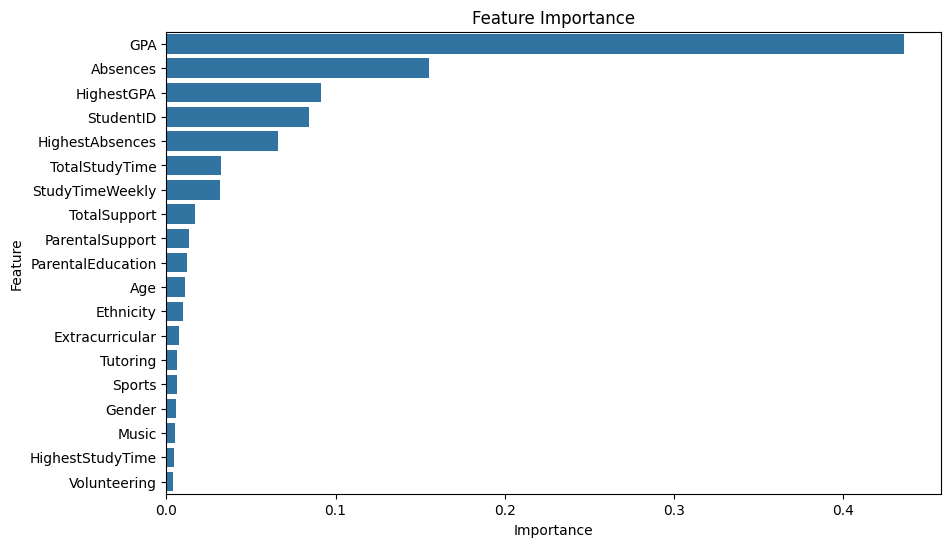

In [475]:
#Showing feature importance on a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

### 6.  Model Building
<p>Build and train at least 3 ML models for Classification using the most important features derived from the last step and evaluate their
performance using various evaluation metrics like accuracy and precision </p>

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

In [ ]:
logregPred = logreg.predict(x_test)
print(confusion_matrix(y_test, logregPred))


[[ 22   0   0]
 [  0  49   0]
 [  0   0 408]]


In [ ]:
print(classification_report(y_test, logregPred))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00        22
          -1       1.00      1.00      1.00        49
           0       1.00      1.00      1.00       408

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



In [ ]:
logAC = accuracy_score(y_test, logregPred) * 100
logAC = round(logAC, 2)
print("Accuracy: {logAC}%".format(logAC=logAC))


Accuracy: 100.0%


#### 5. C. Random Forest<br>
<p>Run the four code blocks below for Random Forest Modeling - the last shows the accuracy. See if we are improving over the Knn model for prediction!</p>


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfcPred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcPred))

[[ 13   2   7]
 [  0  44   5]
 [  1   6 401]]


In [ ]:
print(classification_report(y_test,rfcPred))

              precision    recall  f1-score   support

          -2       0.93      0.59      0.72        22
          -1       0.85      0.90      0.87        49
           0       0.97      0.98      0.98       408

    accuracy                           0.96       479
   macro avg       0.92      0.82      0.86       479
weighted avg       0.96      0.96      0.95       479



In [ ]:
rfAcc = accuracy_score(y_test,rfcPred) * 100
rfAcc = round(rfAcc, 2)
print("Accuracy: {rfAcc}%".format(rfAcc=rfAcc))

Accuracy: 95.62%


#### KNeighborsClassifier<br>



In [ ]:
ka = KNeighborsClassifier()
ka.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
kaPredic = ka.predict(X_test)
print(confusion_matrix(y_test, kaPredic))

[[  4   6  12]
 [  1  14  34]
 [  0   9 399]]


In [ ]:
print(classification_report(y_test,kaPredic))

              precision    recall  f1-score   support

          -2       0.80      0.18      0.30        22
          -1       0.48      0.29      0.36        49
           0       0.90      0.98      0.94       408

    accuracy                           0.87       479
   macro avg       0.73      0.48      0.53       479
weighted avg       0.85      0.87      0.85       479



In [ ]:
#print accuracy
kaAccurate = accuracy_score(y_test,kaPredic) * 100
kaAccurate = round(kaAccurate, 2)
print("Accuracy: {kaAccurate}%".format(kaAccurate=kaAccurate))

Accuracy: 87.06%


#### 7. Hyperparameter Tuning<br>
<p>Collaboratively perform hyperparameter tuning on the best-performing model to optimize its
performance.
Utilize techniques like grid search or random search for hyperparameter optimization</p>

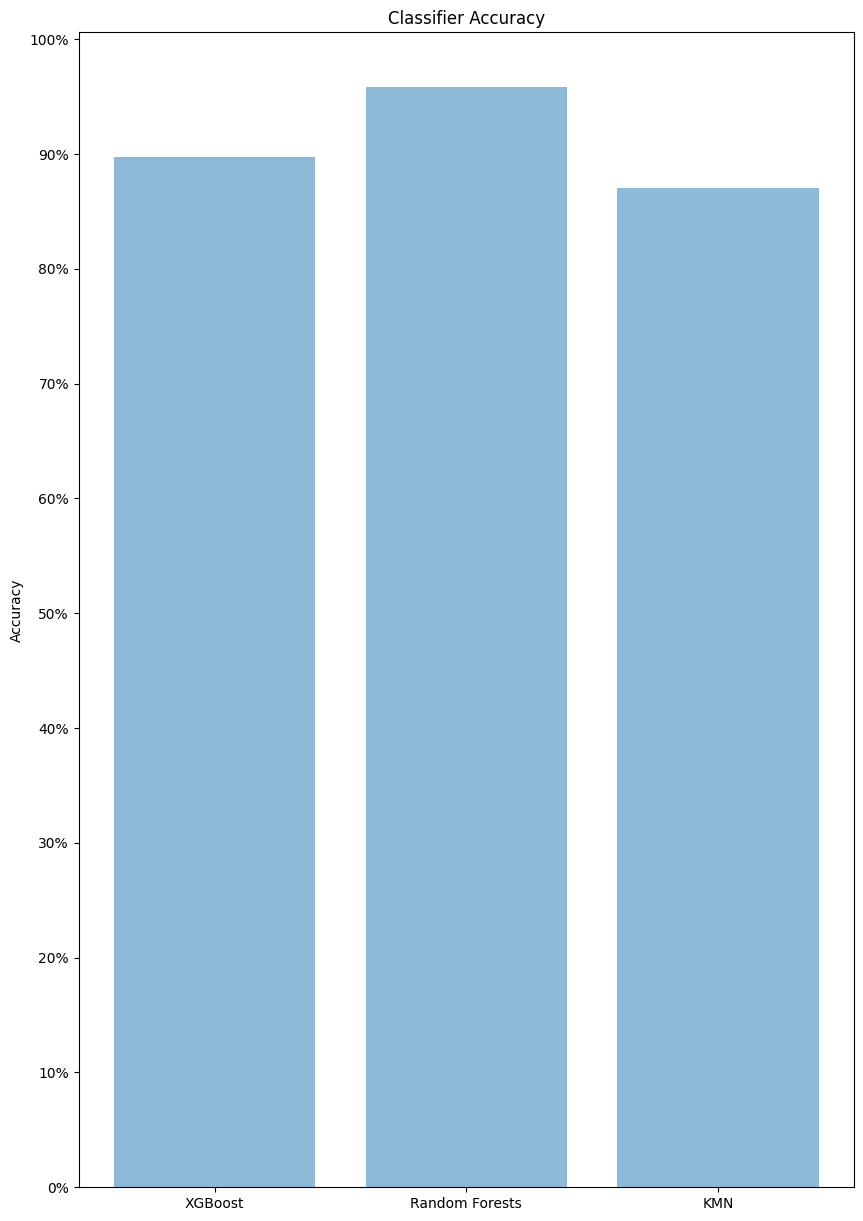

In [ ]:
classifiers = ["XGBoost", "Random Forests", "KMN"]
accuracies = [logAC, rfAcc, kaAccurate]
x = np.arange(len(classifiers))
ytickLabels = ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(10, 15))
plt.bar(x, accuracies, align='center', alpha=0.5)
plt.xticks(x, classifiers)
plt.yticks(yticks, ytickLabels)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

In [ ]:
#let's try a prediction

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print("Tuned Model Performance on Test Set:")
print(f"Accuracy of my model is {accuracy:.2f}")
print(f"Precision of my model is {precision:.2f}")
print(f"Recall of my model is {recall:.2f}")
print(f"F1 Score of my model is {f1:.2f}")




Tuned Model Performance on Test Set:
Accuracy of my model is 0.95
Precision of my model is 0.95
Recall of my model is 0.95
F1 Score of my model is 0.95
